# Analysis of video game industry from 1980 to 2020

![](https://gameranx.com/wp-content/uploads/2017/10/mario-evolved-700x354.jpg)


<p>This project aims at exploring the video industry from the <a href="https://www.kaggle.com/gregorut/videogamesales">Kaggle Dataset videogamesales</a>. We are going to study the different specifications of this market and try to understand how it works. 
    
The dataset is composed of **10 columns**: 

* Rank - Ranking of overall sales

* Name - The games name

* Platform - Platform of the games release (i.e. PC,PS4, etc.)

* Year - Year of the game's release

* Genre - Genre of the game

* Publisher - Publisher of the game

* NA_Sales - Sales in North America (in millions)

* EU_Sales - Sales in Europe (in millions)

* JP_Sales - Sales in Japan (in millions)

* Other_Sales - Sales in the rest of the world (in millions)

* Global_Sales - Total worldwide sales



In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Exploration of the dataframe

Before analyzing anything, we are first going to explore the dataframe and understand if there are any mistakes (such as missing values). 

In [2]:
dataset = pd.read_csv('../input/videogamesales/vgsales.csv', index_col='Rank')
print(dataset.head())
print(dataset.info())

                          Name Platform    Year         Genre Publisher  \
Rank                                                                      
1                   Wii Sports      Wii  2006.0        Sports  Nintendo   
2            Super Mario Bros.      NES  1985.0      Platform  Nintendo   
3               Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
4            Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
5     Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

      NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
Rank                                                           
1        41.49     29.02      3.77         8.46         82.74  
2        29.08      3.58      6.81         0.77         40.24  
3        15.85     12.88      3.79         3.31         35.82  
4        15.75     11.01      3.28         2.96         33.00  
5        11.27      8.89     10.22         1.00         31.37  
<class 'pandas.core.frame.

Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool


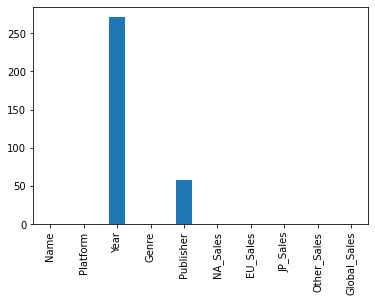

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [3]:
#Missing Values 

print(dataset.isna().any())

# Bar plot of missing values by variable
dataset.isna().sum().plot(kind="bar")

# Show plot
plt.show()

#Drop duplicates 

dataset.drop_duplicates()

# Missing values
We have missing values in the Year and Publisher columns. However, since we are not going to perform any Machine Learning techniques here (for example Linear Regression) and since the DataFrame is extremely large, those missing values do not represent such an important amount to do anything about it.

# How many platforms and games are there?

In [4]:
#How many platforms are there in the dataset? 

dataset_countplatforms = dataset['Platform'].nunique()
print("There are", dataset_countplatforms, "platforms.")

#How many videogames are there in the dataset? 

dataset_countnames = dataset['Name'].nunique()
print("There are", dataset_countnames, "games.")

#Years to years?

Year_Min = dataset['Year'].min()
Year_Max = dataset['Year'].max()
print("The dataset starts in:", Year_Min)
print("The dataset ends in:", Year_Max)

There are 31 platforms.
There are 11493 games.
The dataset starts in: 1980.0
The dataset ends in: 2020.0


# What is the distribution of games between the platforms?

In [5]:
#How many games by platform? 

Games_Count = dataset.groupby('Platform')['Name'].agg('count')
Games_Count = Games_Count.sort_values(ascending = False)
print(Games_Count)

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Name, dtype: int64


The DS game boy is the consoles with the more games. It is then directly followed by Playstation with the PS2 and the PS3. Playsation seems to be offering more games to their users for their home consoles. But if we take a closer look, Nintendo is also more diversified and offer a wider range of possibilities. 

              Global_Sales
Genre                     
Action             1751.18
Adventure           239.04
Fighting            448.91
Misc                809.96
Platform            831.37
Puzzle              244.95
Racing              732.04
Role-Playing        927.37
Shooter            1037.37
Simulation          392.20
Sports             1330.93
Strategy            175.12


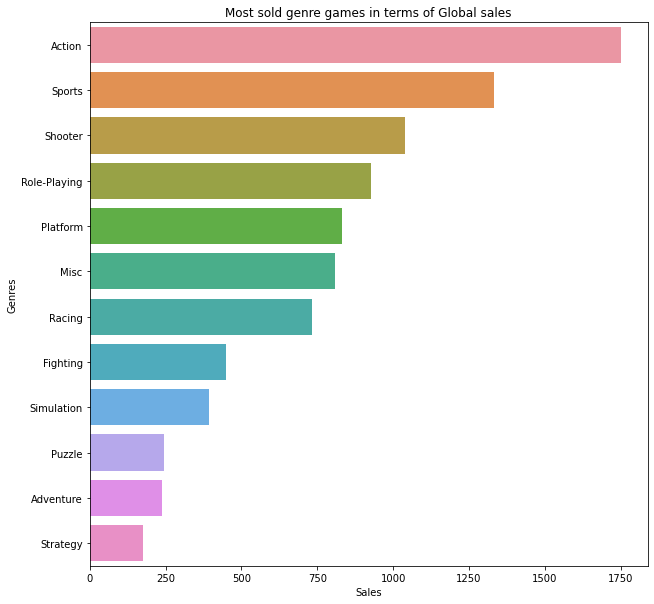

In [6]:
#Most popular genre in the dataset by Sum of Worldwide Sales

Grouped_Genre = dataset.pivot_table(values='Global_Sales',index='Genre', aggfunc='sum')
print(Grouped_Genre)
Grouped_Genre = Grouped_Genre.sort_values(by = 'Global_Sales',ascending  = False)

# Plot the data  
plt.rcParams['figure.figsize'] = (10,10)
sns.barplot(Grouped_Genre['Global_Sales'],Grouped_Genre.index, orient='h')
plt.title("Most sold genre games in terms of Global sales")
plt.ylabel("Genres")
plt.xlabel("Sales")
plt.show()

The Action genre dominates the Global Market by 20%. Sport games are then the second most popular genre (15% of the market). *It is an interesting insight as we will see later that sport games might actually dominate the whole market*.

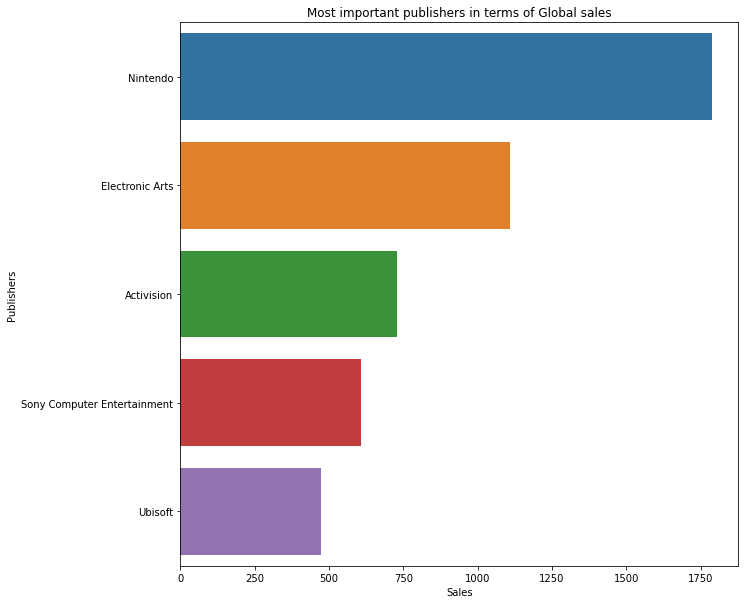

In [7]:
#5 best Publisher  

plt.rcParams['figure.figsize'] = (10,10)
Publisher_Sales  = dataset.pivot_table(index = 'Publisher' ,values = 'Global_Sales',aggfunc = np.sum)
Publisher_Sales  = Publisher_Sales.sort_values(by = 'Global_Sales',ascending  = False).head(5)
sns.barplot(Publisher_Sales['Global_Sales'],Publisher_Sales.index, orient='h')
plt.title("Most important publishers in terms of Global sales")
plt.ylabel("Publishers")
plt.xlabel("Sales")
plt.show()

While we saw previously that **Playstation** was offering more games to their home console users. It does appear that Nintendo is by far the most popular publisher when it comes to global sales. Electronic Arts is 2nd while Sony is 4th. Ubisoft also appear to the last one despite the fact that most of their games can be considered as legendary in terms of reputation. 

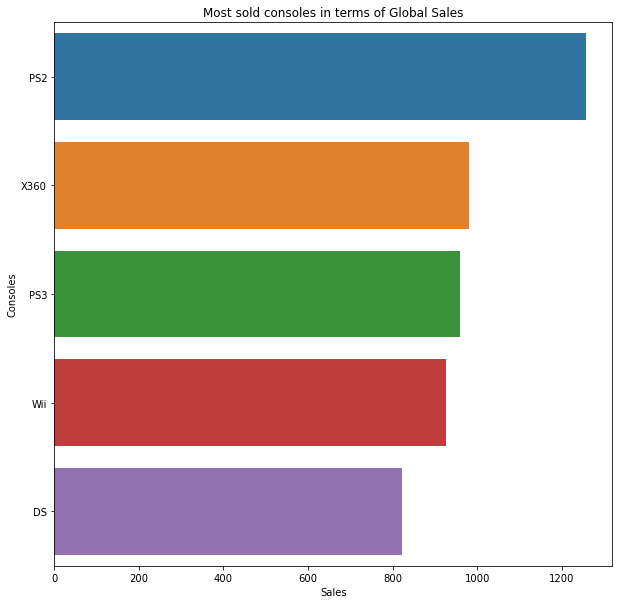

In [8]:
#5 Best Platform

plt.rcParams['figure.figsize'] = (10,10)
Platform_Sales  = dataset.pivot_table(index = 'Platform' ,values = 'Global_Sales',aggfunc = np.sum)
Platform_Sales  = Platform_Sales.sort_values(by = 'Global_Sales',ascending  = False).head(5)
sns.barplot(Platform_Sales['Global_Sales'],Platform_Sales.index, orient='h')
plt.title("Most sold consoles in terms of Global Sales")
plt.ylabel("Consoles")
plt.xlabel("Sales")
plt.show()

If Nintendo produces and sells more games (The DS game boy might have helped from what we saw earlier). The PS2 is the most sold home console by far. The PS3 is in the 3rd position while the Nintendo Wii and DS gameboy are occupying the 4th and 5th positions respectively. This is interesting as Nintendo does sale more games as a publishers but Playsation appears to be the favorite when it comes to consoles. **Nintendo is however the leader in the field of portable consoles.**

                                Global_Sales
Name                                        
Wii Sports                             82.74
Grand Theft Auto V                     55.92
Super Mario Bros.                      45.31
Tetris                                 35.84
Mario Kart Wii                         35.82
Wii Sports Resort                      33.00
Pokemon Red/Pokemon Blue               31.37
Call of Duty: Black Ops                31.03
Call of Duty: Modern Warfare 3         30.83
New Super Mario Bros.                  30.01


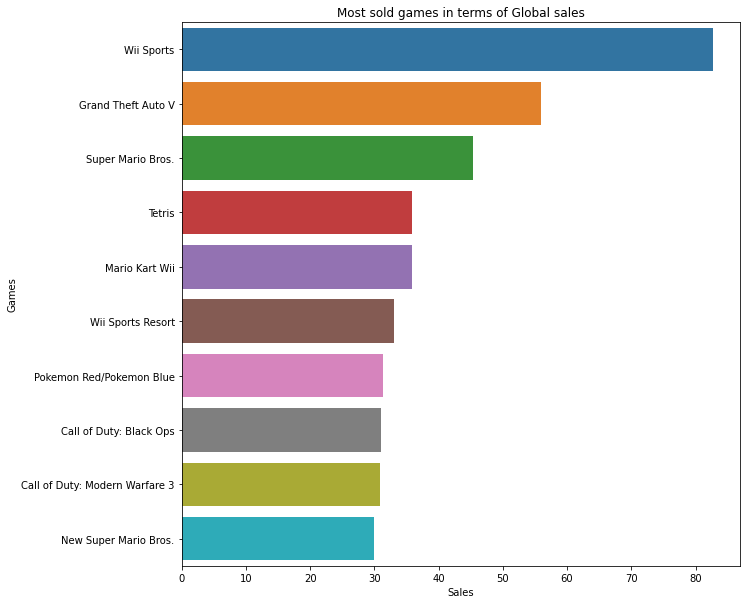

In [9]:
#Best games 

plt.rcParams['figure.figsize'] = (10,10)
Games_Sales  = dataset.pivot_table(index = 'Name' ,values = 'Global_Sales',aggfunc = np.sum)
Games_Sales  = Games_Sales.sort_values(by = 'Global_Sales', ascending  = False).head(10)
print(Games_Sales)
sns.barplot(Games_Sales['Global_Sales'],Games_Sales.index, orient='h')
plt.title("Most sold games in terms of Global sales")
plt.ylabel("Games")
plt.xlabel("Sales")
plt.show()

Remember when we said that sport genre games might be more popular than the action genre? Well it turns out that **Wii Sport** was the most sold game on the globe. Nintendo does seem to master the market as 5 of the games in this top 10 were published by Nintendo. 

# Evolution and Distribution of sales (Worldwide)

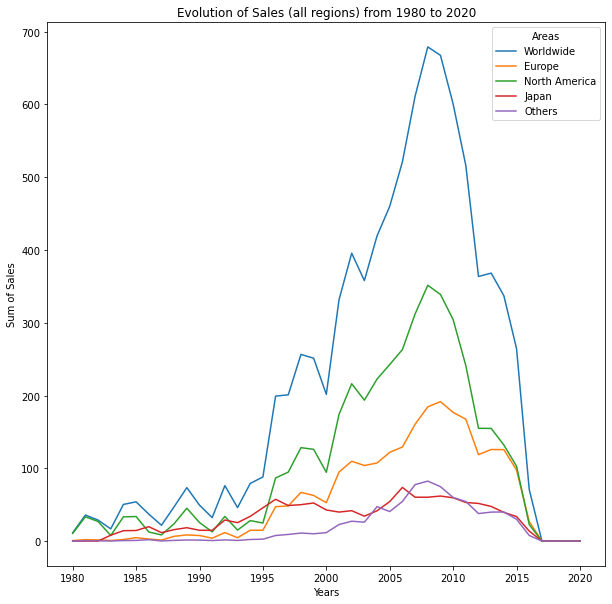

In [10]:
#Global Sales Evolution 

Global_Sales_Evolution  = dataset.pivot_table(index = 'Year' ,values = 'Global_Sales',aggfunc = np.sum)
sns.lineplot(Global_Sales_Evolution.index, Global_Sales_Evolution['Global_Sales'])

#EU Sales Evolution 

EU_Sales_Evolution  = dataset.pivot_table(index = 'Year' ,values = 'EU_Sales',aggfunc = np.sum)
sns.lineplot(EU_Sales_Evolution.index, EU_Sales_Evolution['EU_Sales'])

#NA Sales Evolution 

NA_Sales_Evolution  = dataset.pivot_table(index = 'Year' ,values = 'NA_Sales',aggfunc = np.sum)
sns.lineplot(NA_Sales_Evolution.index, NA_Sales_Evolution['NA_Sales'])

#JP Sales Evolution 

JP_Sales_Evolution  = dataset.pivot_table(index = 'Year' ,values = 'JP_Sales',aggfunc = np.sum)
sns.lineplot(JP_Sales_Evolution.index, JP_Sales_Evolution['JP_Sales'])

#Other Sales Evolution 

O_Sales_Evolution  = dataset.pivot_table(index = 'Year' ,values = 'Other_Sales',aggfunc = np.sum)
sns.lineplot(O_Sales_Evolution.index, O_Sales_Evolution['Other_Sales'])

plt.rcParams['figure.figsize'] = (10,10)
plt.legend(title='Areas', loc='upper right', labels=['Worldwide', 'Europe', 'North America', 'Japan', 'Others'])
plt.title("Evolution of Sales (all regions) from 1980 to 2020")
plt.ylabel("Sum of Sales")
plt.xlabel("Years")
plt.show()

In terms of the evolution and distribution of the sales, North America appears to be the first and most important market. Europe is in second position followed by other areas. The Japan curve is not behaving exactly as the others. If the Global, European and North American sales follow one same path, Japan has a different evolution and appear to look smaller in volumes but more stable over time.  Regarding the rest of the world, we can see on the chart that there was an important peek starting in the year 1995. It did reach its highest point from the years 2000 to 2010 before it started to decrease. The lines after 2015 are rapidly flattening because we are missing data. 

# How is the market shared among the publishers?

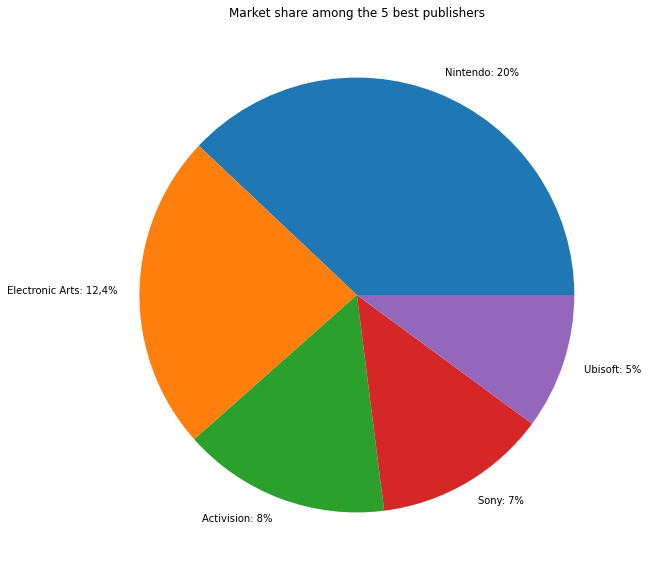

In [11]:
#Market Share Publishers 

All_Sales = dataset["Global_Sales"].sum()
Sales_Nintendo = dataset[dataset["Publisher"] == "Nintendo"]["Global_Sales"].sum() 
Sales_Nintendo = (Sales_Nintendo / All_Sales) * 100
Sales_Electronic_Arts = dataset[dataset["Publisher"] == "Electronic Arts"]["Global_Sales"].sum() * 100 / All_Sales
Sales_Activision = dataset[dataset["Publisher"] == "Activision"]["Global_Sales"].sum() * 100 / All_Sales
Sales_Sony = dataset[dataset["Publisher"] == "Sony Computer Entertainment"]["Global_Sales"].sum() * 100 / All_Sales
Sales_Ubisoft = dataset[dataset["Publisher"] == "Ubisoft"]["Global_Sales"].sum() * 100 / All_Sales
Market_Plot = [Sales_Nintendo, Sales_Electronic_Arts, Sales_Activision, Sales_Sony, Sales_Ubisoft]
plt.pie(Market_Plot, labels=['Nintendo: 20%', 'Electronic Arts: 12,4%', 'Activision: 8%', 'Sony: 7%', 'Ubisoft: 5%'])
plt.title("Market share among the 5 best publishers")
plt.show()

1. No surprise here. **Nintendo** is the leader among the publishers with 20% of the market share. The diversity of their consoles and the number of games they publish are among the highest. Also, Wii sport is the most popular game in the world and it must have given them a head start. 

# Wait, what could be the most popular games among those 5 all mighty publishers? 

In [12]:
#Nintendo 

Top_Nintendo_Game = dataset[dataset.Publisher == "Nintendo"][["Name","Global_Sales"]].drop_duplicates(["Name"]).head(1)
Top_Nintendo_Game = Top_Nintendo_Game.set_index('Name')
Top_Nintendo_Game.columns.name = 'Nintendo'

print(Top_Nintendo_Game)

#Electronic Arts

Top_ElectronicArts_Game = dataset[dataset.Publisher == "Electronic Arts"][["Name","Global_Sales"]].drop_duplicates(["Name"]).head(1)
Top_ElectronicArts_Game = Top_ElectronicArts_Game.set_index('Name')
Top_ElectronicArts_Game.columns.name = 'Electronic Arts'
print(Top_ElectronicArts_Game)

#Activision 

Top_Activision_Game = dataset[dataset.Publisher == "Activision"][["Name","Global_Sales"]].drop_duplicates(["Name"]).head(1)
Top_Activision_Game = Top_Activision_Game.set_index('Name')
Top_Activision_Game.columns.name = 'Activision'
print(Top_Activision_Game)

#Sony 

Top_Sony_Game = dataset[dataset.Publisher == "Sony Computer Entertainment"][["Name","Global_Sales"]].drop_duplicates(["Name"]).head(1)
Top_Sony_Game = Top_Sony_Game.set_index('Name')
Top_Sony_Game.columns.name = 'Sony'
print(Top_Sony_Game)

#Ubisoft 

Top_Ubisoft_Game = dataset[dataset.Publisher == "Ubisoft"][["Name","Global_Sales"]].drop_duplicates(["Name"]).head(1)
Top_Ubisoft_Game = Top_Ubisoft_Game.set_index('Name')
Top_Ubisoft_Game.columns.name = 'Ubisoft'
print(Top_Ubisoft_Game)

Nintendo    Global_Sales
Name                    
Wii Sports         82.74
Electronic Arts  Global_Sales
Name                         
FIFA 16                  8.49
Activision                      Global_Sales
Name                                        
Call of Duty: Modern Warfare 3         14.76
Sony                    Global_Sales
Name                                
Gran Turismo 3: A-Spec         14.98
Ubisoft       Global_Sales
Name                      
Just Dance 3         10.26


Here we have the most popular games among the 5 most important game publishers. We already saw that **Wii sport** was ranking first among all of them. **FIFA 16** from Activision is also quite popular. In terms of sales, **Call of Duty: Modern Warfare 3** is the second most popular games among those 5 most powerful publishers. 

# Sales by region and customers' preferences 

In [13]:
#By Regions 

##Others

Sales_Others = dataset.groupby(['Name', 'Publisher', 'Platform', 'Genre'])['Other_Sales'].sum()
Sales_Others = Sales_Others.sort_values(ascending=False).head(5)
Sales_Others = Sales_Others.reset_index()

##JAPAN

Sales_INJapan = dataset.groupby(['Name', 'Publisher', 'Platform', 'Genre'])['JP_Sales'].sum()
Sales_INJapan = Sales_INJapan.sort_values(ascending=False).head(5)


##EUROPE 
Sales_INEU = dataset.groupby(['Name', 'Publisher', 'Platform', 'Genre'])['EU_Sales'].sum()
Sales_INEU = Sales_INEU.sort_values(ascending=False).head(5)
Sales_INEU = Sales_INEU.reset_index()

##North America 

Sales_INNA = dataset.groupby(['Name', 'Publisher', 'Platform', 'Genre'])['NA_Sales'].sum()
Sales_INNA = Sales_INNA.sort_values(ascending=False).head(5)
Sales_INNA = Sales_INNA.reset_index()

print(Sales_Others)
print(Sales_INJapan)
print(Sales_INEU)
print(Sales_INNA)

                            Name                    Publisher Platform  \
0  Grand Theft Auto: San Andreas         Take-Two Interactive      PS2   
1                     Wii Sports                     Nintendo      Wii   
2                 Gran Turismo 4  Sony Computer Entertainment      PS2   
3             Grand Theft Auto V         Take-Two Interactive      PS3   
4                 Mario Kart Wii                     Nintendo      Wii   

    Genre  Other_Sales  
0  Action        10.57  
1  Sports         8.46  
2  Racing         7.53  
3  Action         4.14  
4  Racing         3.31  
Name                           Publisher  Platform  Genre       
Pokemon Red/Pokemon Blue       Nintendo   GB        Role-Playing    10.22
Pokemon Gold/Pokemon Silver    Nintendo   GB        Role-Playing     7.20
Super Mario Bros.              Nintendo   NES       Platform         6.81
New Super Mario Bros.          Nintendo   DS        Platform         6.50
Pokemon Diamond/Pokemon Pearl  Nintendo   DS

For the last question, we wondered if every area in the world were behaving in the same way in terms of sales. Is Wii sport as much popular in Japan as it is in Europe? 

Well, it turns out that Wii sports was among the most popular game in North American and Europe. However, in Japan, portable console gameboys dominate the sales as two different version of Pokemon are at the top. The 3 other games are also from portable consoles by the way. 

**No wonder Nintendo is the winner among the publishers. **

# Conclusion 

![](https://2ngaw.com/wp-content/uploads/2014/02/Nintendo-3DS-vs-PlayStation-Vita.png)

If we stricly speak in popularity and sales terms, **Nintendo** is the winner (especially with Wii sport and portable consoles). **Nintendo** offers a true diversity when it comes to consoles. However **Playsation** is by far the winner for the home consoles, the PS2 being their most sold and popular console. While **Nintendo** publishes lots of games, Sony sells more consoles and might take advantage of the different publishers that create games for their consoles. 